In [96]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
db_file = "./data/database.sqlite"
try:
    conn = sqlite3.connect(db_file)
except Error as e:
    print(e)

In [17]:
cur  = conn.cursor()
tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
# conn.tables

In [18]:
tables.fetchall()

[(u'sqlite_sequence',),
 (u'Player_Attributes',),
 (u'Player',),
 (u'Match',),
 (u'League',),
 (u'Country',),
 (u'Team',),
 (u'Team_Attributes',)]

In [88]:
players = pd.read_sql_query("SELECT * from Player", conn)
match = pd.read_sql_query("SELECT * from Match",conn)
league = pd.read_sql_query("SELECT * from League",conn)
team = pd.read_sql_query("SELECT * from Team",conn)
player_attr = pd.read_sql_query("SELECT * from Player_Attributes",conn)
team_attr = pd.read_sql_query("SELECT * from Team_Attributes",conn)

In [80]:
num_matches = g.merge(league,left_on='league_id',right_on='id')
num_matches['no_of_matches'] = num_matches['count']
num_matches = num_matches[['name', 'no_of_matches']]

In [82]:
num_matches

,name,no_of_matches
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


In [99]:
barca = team_attr.iloc[123]
barca = barca.drop(['id','team_fifa_api_id','team_api_id','date'])
barca = pd.DataFrame(barca)

In [103]:
# barca.to_html()

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>FC Barcelona</th>    </tr>  </thead>  <tbody>    <tr>      <th>buildUpPlaySpeed</th>      <td>36</td>    </tr>    <tr>      <th>buildUpPlaySpeedClass</th>      <td>Balanced</td>    </tr>    <tr>      <th>buildUpPlayDribbling</th>      <td>35</td>    </tr>    <tr>      <th>buildUpPlayDribblingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>buildUpPlayPassing</th>      <td>51</td>    </tr>    <tr>      <th>buildUpPlayPassingClass</th>      <td>Mixed</td>    </tr>    <tr>      <th>buildUpPlayPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>chanceCreationPassing</th>      <td>36</td>    </tr>    <tr>      <th>chanceCreationPassingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationCrossing</th>      <td>49</td>    </tr>    <tr>      <th>chanceCreationCrossingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationShooting</th>      <td>56</td>    </tr>    <tr>      <th>chanceCreationShootingClass</th>      <td>Normal</td>    </tr>    <tr>      <th>chanceCreationPositioningClass</th>      <td>Free Form</td>    </tr>    <tr>      <th>defencePressure</th>      <td>61</td>    </tr>    <tr>      <th>defencePressureClass</th>      <td>Medium</td>    </tr>    <tr>      <th>defenceAggression</th>      <td>65</td>    </tr>    <tr>      <th>defenceAggressionClass</th>      <td>Press</td>    </tr>    <tr>      <th>defenceTeamWidth</th>      <td>65</td>    </tr>    <tr>      <th>defenceTeamWidthClass</th>      <td>Normal</td>    </tr>    <tr>      <th>defenceDefenderLineClass</th>      <td>Cover</td>    </tr>  </tbody></table>

In [27]:
players[players['player_name'] == 'Lionel Messi']

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159


In [34]:
# player_attr[player_attr['player_api_id'] == 30981]
messi = player_attr.iloc[102482].drop(['id','player_fifa_api_id','player_api_id','date','preferred_foot','attacking_work_rate',
                              'defensive_work_rate'])

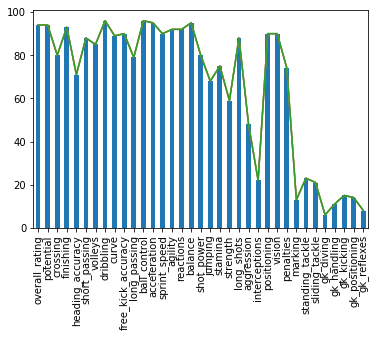

In [46]:
messi.plot(kind='bar')
plt.show()

In [75]:
match.shape

(25979, 115)

In [62]:
g = match.groupby('league_id').count()
g['count'] = g['id']
g = pd.DataFrame(g['count'])

In [87]:
# league

In [70]:
g['league_id'] = g.index

In [86]:
keys = match.keys()
for k in keys:
#     print k

IndentationError: expected an indented block (<ipython-input-86-69e6230dec3d>, line 3)

B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
LBH
LBD
LBA
PSH
PSD
PSA
WHH
WHD
WHA
SJH
SJD
SJA
VCH
VCD
VCA
GBH
GBD
GBA
BSH
BSD
BSA